## 1️⃣. Intoduction

This project simulates a real-world Amazon Returns & Reimbursement Risk Analysis scenario.

The goal is to identify inefficiencies, SLA breaches, and potential fraud patterns within product return cases across different markets and claim programs.

As part of Amazon’s reimbursement operations, returns teams handle a large volume of cases that involve refund processing, buyer-seller dispute resolution, and fraud investigation.
Through this project, we recreate that analytical workflow — focusing on how data can be leveraged to:

>Evaluate operational performance (SLA adherence, resolution times, and handling efficiency)
>
>Quantify financial exposure from fraudulent or high-risk return cases
>
>Assess the impact of internal policy changes (via a mock SOP improvement scenario)
>
>Build a dashboard-driven reporting layer for end-user insights (Ops, Risk, and Finance teams)
>
>The dataset and structure are inspired by real Amazon workflows but are synthetically generated for confidentiality and demonstration purposes.

### 🎯 Objective  

The objective of this project is to design a data-driven framework that can:

1. Monitor operational efficiency – track SLA compliance, handling time, and resolution performance across programs and markets.

2. Detect and quantify fraud risk – identify high-risk sellers, categories, and claims contributing to disproportionate refund exposure.

3. Model policy impact – simulate pre- and post-SOP scenarios to evaluate how process changes could influence key metrics.

4. Enable actionable reporting – export structured outputs for an Excel-based dashboard built to visualize operational, risk, and financial KPIs.




## 2️⃣ Imports / Data Setup & Validation

This section initializes the analysis environment — importing core Python libraries, connecting to a local SQLite database, and loading the main dataset (`returns_cases.csv`).

In [ ]:
# Import the required libraries
import sqlite3
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set_palette("muted")

# for other palettes of seaborn

# "muted", "colorblind",  "deep"

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


### Data Import & Architecture Overview
  


In [ ]:
# Base path where  CSV files are stored
base_path = "/content/drive/MyDrive/Portfolio Projects/Returns & Reimbursement Risk Analysis/Data"
db_path = os.path.join(base_path, "amazon_fraud.db")

# Connect to SQLite
conn = sqlite3.connect(db_path)
print(f"Connected to SQLite DB at: {db_path}\n")

# List of CSV files and table names, with explicit dtype mapping
csv_table = {
    "returns_cases.csv": {
        "table_name": "returns_cases",
        "dtype": {
            "return_id": "INTEGER",
            "order_id": "INTEGER",
            "seller_id": "INTEGER",
            "customer_id": "INTEGER",
            "asin": "TEXT",
            "program_type": "TEXT",
            "market": "TEXT",
            "claim_type": "TEXT",
            "category": "TEXT",
            "return_date": "DATE",
            "resolution_date": "TEXT",
            "resolution_time_days": "INTEGER",
            "handling_time_minutes": "INTEGER",
            "refund_amount": "REAL",
            "tracking_status": "TEXT",
            "buyer_seller_comm_flag": "BOOLEAN",
            "agent_code": "TEXT",
            "fraud_probability": "REAL",
            "fraud_flag": "INTEGER",
            "fraud_reason": "TEXT",
            "status": "TEXT"
        }
    }

        }


# Load each CSV into SQLite with correct dtypes
csv_file = "returns_cases.csv"
info = csv_table[csv_file]
path = os.path.join(base_path, csv_file)

if os.path.exists(path):
    df_returns = pd.read_csv(path)
    df_returns.to_sql(info["table_name"], conn, if_exists="replace", index=False, dtype=info["dtype"])
    print(f"Loaded {csv_file} → Table: {info['table_name']} ({len(df_returns)} rows)")
else:
    print(f"File not found: {path}")

# Verify tables
print("\nTable in SQLite DB:")
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

#  check unique values for critical columns to ensure no NULLs
print("\nTables in SQLite DB:")
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
display(tables)

print("\nSample records from returns_cases:")
display(df_returns.head(3))

print("\nAll done. SQLite DB ready for queries and dashboarding.")


Connected to SQLite DB at: /content/drive/MyDrive/Portfolio Projects/Returns & Reimbursement Risk Analysis/Data/amazon_fraud.db

Loaded returns_cases.csv → Table: returns_cases (11000 rows)

Table in SQLite DB:
             name
0         sellers
1       customers
2        products
3          agents
4          orders
5  seller_metrics
6   returns_cases

Tables in SQLite DB:


,name
0,sellers
1,customers
2,products
3,agents
4,orders
5,seller_metrics
6,returns_cases



Sample records from returns_cases:


,return_id,order_id,seller_id,customer_id,asin,program_type,market,claim_type,category,return_date,...,resolution_time_days,handling_time_minutes,refund_amount,tracking_status,buyer_seller_comm_flag,agent_code,fraud_probability,fraud_flag,fraud_reason,status
0,1,1,31,2547,ASIN000053,SAFE-T,EU,DNOTR,Books,2023-09-26,...,9,4,82.38,Delivered,False,AG056,0.665083,1,DNOTR | HighSellerRefundRate,Resolved
1,2,6,323,3215,ASIN000988,SAFE-T,EU,Wrong Item,Electronics,2023-05-13,...,4,4,22.82,Delivered,False,AG057,0.354389,0,WrongItem | Electronics,Resolved
2,3,7,332,891,ASIN001482,OTC,EU,Wrong Item,Electronics,2024-07-05,...,5,7,57.33,Delivered,True,AG067,0.460060,0,WrongItem | Electronics,Resolved



All done. SQLite DB ready for queries and dashboarding.


In [ ]:
# conn.close()
# print("\nDatabase connection closed successfully.")

### Data Architecture Overview

To emulate Amazon’s operational data environment, multiple relational tables (sellers, customers, products, orders, agents, seller metrics, and returns cases) were originally generated to simulate a real-world ecosystem.  

However, since all key KPIs — refund amounts, SLA breaches, and fraud metrics — are derived at the *returns-case level*, this analysis focuses exclusively on the **`returns_cases.csv`** dataset.

The supporting tables are documented for realism but not loaded here to maintain focus and efficiency.

| Table | Description | Key Fields |
|--------|--------------|-------------|
| **sellers** | Seller master details by market | seller_id, market |
| **customers** | Buyer region and risk profile | customer_id, region, risk_tier |
| **products** | Product catalog and category mapping | asin, category, price |
| **orders** | Order-level transactions and shipment status | order_id, seller_id, asin |
| **returns_cases** | Core analytical table for refunds, fraud, and SLA data | return_id, program_type, market, refund_amount |
| **seller_metrics** | Aggregated seller-performance metrics | refund_rate, odr, cancel_rate |

⚙️ *For this analysis,* the **`returns_cases` table** serves as the **central fact table**.  
All fraud, SLA, and financial KPIs are derived from it.  

The remaining tables were generated to mirror a real operational schema and to enable any future joins or model extensions (e.g., market-wise trend enrichment or seller risk scoring).


###  Data Validation & Quality Assurance.

###  Null & Duplicate Verification  
Checking  for nulls and duplicate records.





In [ ]:
query="""

SELECT * FROM returns_cases

     """
returns = pd.read_sql(query, conn)

returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   return_id               11000 non-null  int64  
 1   order_id                11000 non-null  int64  
 2   seller_id               11000 non-null  int64  
 3   customer_id             11000 non-null  int64  
 4   asin                    11000 non-null  object 
 5   program_type            11000 non-null  object 
 6   market                  11000 non-null  object 
 7   claim_type              11000 non-null  object 
 8   category                11000 non-null  object 
 9   return_date             11000 non-null  object 
 10  resolution_date         11000 non-null  object 
 11  resolution_time_days    11000 non-null  int64  
 12  handling_time_minutes   11000 non-null  int64  
 13  refund_amount           11000 non-null  float64
 14  tracking_status         11000 non-null

In [ ]:
returns.head()

,return_id,order_id,seller_id,customer_id,asin,program_type,market,claim_type,category,return_date,...,resolution_time_days,handling_time_minutes,refund_amount,tracking_status,buyer_seller_comm_flag,agent_code,fraud_probability,fraud_flag,fraud_reason,status
0,1,1,31,2547,ASIN000053,SAFE-T,EU,DNOTR,Books,2023-09-26,...,9,4,82.38,Delivered,0,AG056,0.665083,1,DNOTR | HighSellerRefundRate,Resolved
1,2,6,323,3215,ASIN000988,SAFE-T,EU,Wrong Item,Electronics,2023-05-13,...,4,4,22.82,Delivered,0,AG057,0.354389,0,WrongItem | Electronics,Resolved
2,3,7,332,891,ASIN001482,OTC,EU,Wrong Item,Electronics,2024-07-05,...,5,7,57.33,Delivered,1,AG067,0.460060,0,WrongItem | Electronics,Resolved
3,4,8,243,1335,ASIN001409,OP,EU,Not As Described,Electronics,2023-05-30,...,3,12,72.98,Returned,1,AG007,0.431548,0,MinorIssue | Electronics,Resolved
4,5,12,809,971,ASIN000450,SAFE-T,NAM,MattDiff,Apparel,2023-11-08,...,4,4,11.36,Returned,1,AG010,0.184829,0,MinorIssue | HighSellerRefundRate,Resolved


In [ ]:
returns.duplicated().sum()

np.int64(0)

## 3️⃣ Exploratory Insights & Fraud Risk Profiling  

This section explores the overall distribution of claims, refunds, and fraud risk across programs, markets, sellers, and product categories.

It establishes where refund and fraud exposure are concentrated and quantifies their potential impact through the Fraud Impact Index (FII).

### 3.1 Exploratory Snapshot  

Before detailed distributional analysis, this is as a quick reference to understand dataset scale and balance.

In [ ]:
query="""
SELECT
COUNT(DISTINCT return_id) AS total_cases,
COUNT(DISTINCT seller_id) AS unique_sellers,
COUNT(DISTINCT customer_id) AS unique_buyers,
COUNT(DISTINCT program_type) AS programs,
COUNT(DISTINCT market) AS markets,
MIN(return_date) AS start_date,
MAX(return_date) AS end_date
FROM returns_cases
"""
df_kpi_overview_1=pd.read_sql(query, conn)
df_kpi_overview_1

,total_cases,unique_sellers,unique_buyers,programs,markets,start_date,end_date
0,11000,1000,4411,3,2,2023-01-03,2024-11-09


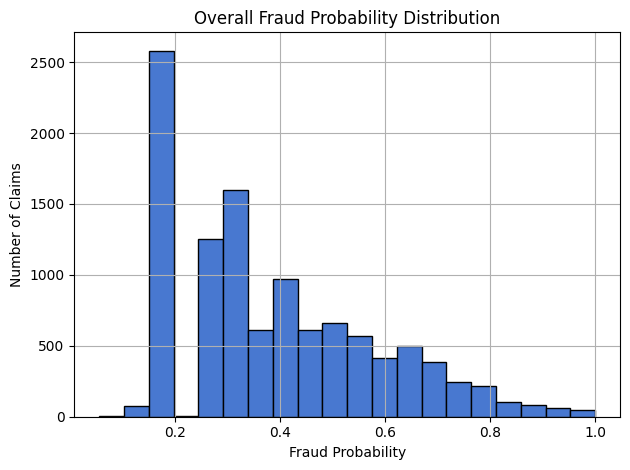

In [ ]:
df1 = pd.read_sql_query("SELECT fraud_probability FROM returns_cases", conn)
df1['fraud_probability'].hist(bins=20, edgecolor='black')
plt.title('Overall Fraud Probability Distribution')
plt.xlabel('Fraud Probability')
plt.ylabel('Number of Claims')
plt.tight_layout()
plt.show()

**Observations:**  

- Dataset covers {3} programs across {2} markets.

- Overall return cases : {11000}.

- Fraud probability distribution is slightly right-skewed, indicating a minority of high-risk claims.


### 3.2 Key Descriptive KPIs  

This subsection establishes the baseline operational and risk indicators for the dataset.  

`What’s the system’s current health`

| Tier                                | Category                                        | Purpose                                             | Example Metrics                                                                                            |
| ----------------------------------- | ----------------------------------------------- | --------------------------------------------------- | ---------------------------------------------------------------------------------------------------------- |
| **1️⃣ Descriptive KPIs**            | “What’s happening overall?”                     | Understand the scale, scope, and typical values.    | Total claims, Avg refund amount, Fraud rate %, Avg handling time, Avg resolution time                      |
| **2️⃣ Operational Efficiency KPIs** | “How well are we handling it?”                  | Reflect service quality and turnaround performance. | SLA compliance %, SLA breach %, Median handling time per program, Resolution success rate                  |
| **3️⃣ Fraud & Financial Risk KPIs** | “Where’s the money or fraud risk concentrated?” | Quantify potential loss or fraud exposure.          | Fraud Impact Index (FII), High-risk seller ratio, Fraud refund value %, Top-category contribution to fraud |


In [ ]:
query="""
SELECT

ROUND(AVG(CASE WHEN market ='NAM' THEN refund_amount ELSE 0 END),2) AS avg_nam_refund,
ROUND(AVG(CASE WHEN market ='EU' THEN refund_amount ELSE 0 END),2) AS avg_eu_refund,
ROUND(SUM(fraud_flag)*100.0/COUNT(*), 2) AS fraud_rate,
ROUND(AVG(fraud_probability), 3) AS avg_fraud_probability,
ROUND(AVG(handling_time_minutes), 1) AS avg_handling_time,
ROUND(AVG(resolution_time_days), 1) AS avg_resolution_time_days
FROM returns_cases
"""
df_kpi_overview_2=pd.read_sql(query, conn)

df_kpi_overview_2

,avg_nam_refund,avg_eu_refund,fraud_rate_pct,avg_fraud_probability,avg_handling_time,avg_resolution_time_days
0,40.24,25.31,28.71,0.392,6.5,4.2


### 3.3 Claim Volume Distribution  
Analyzes claim volumes across marketplaces, claim types, and programs to highlight where operational load and refund exposure are concentrated.


`Where the cases occur`

Total Claim count by Claim Type and Market Place

In [ ]:
query="""
SELECT market ,claim_type , COUNT(*) AS total_count
FROM returns_cases
GROUP BY market,claim_type
ORDER BY market DESC ,  total_count DESC
"""
df=pd.read_sql(query, conn)

df

,market,claim_type,total_count
0,NAM,MattDiff,1374
1,NAM,Damaged,1310
2,NAM,Not As Described,1293
3,NAM,RNOTR,1028
4,NAM,Wrong Item,677
5,NAM,DNOTR,560
6,NAM,Counterfeit,477
7,EU,Damaged,886
8,EU,Not As Described,864
9,EU,MattDiff,848


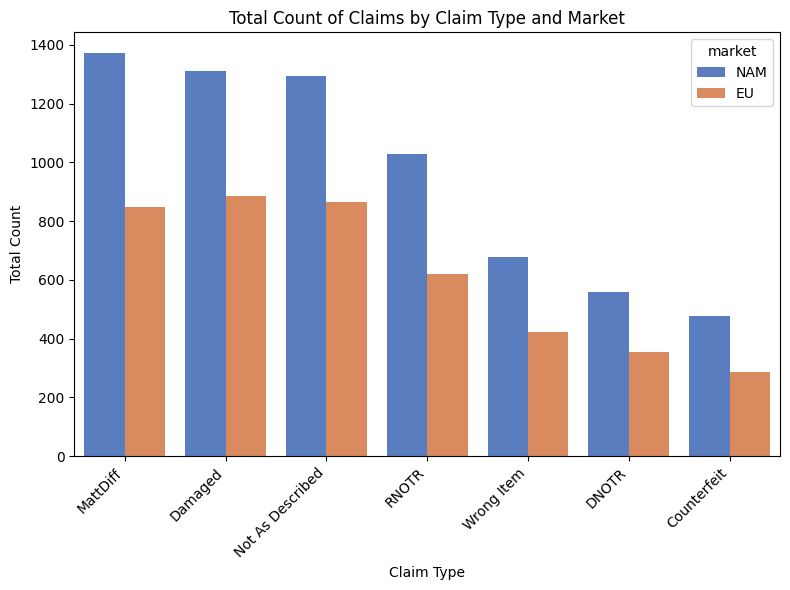

In [ ]:
custom_palette = ["#1f77b4", "#ff7f0e"]
plt.figure(figsize=(8,6))
sns.barplot(df,x='claim_type',y='total_count',hue='market')

plt.title('Total Count of Claims by Claim Type and Market')
plt.xlabel('Claim Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 3 types of Claims in both Market places are Materially Different , Damaged and Not as Described

North American Market has more number of  Total Claims when compared to EU

Total Claim count by Program Type and Claim Type

In [ ]:
query="""
SELECT program_type ,claim_type , COUNT(*) AS total_count
FROM returns_cases
GROUP BY program_type,claim_type
ORDER BY  program_type DESC , claim_type ASC ,  total_count DESC

"""
df=pd.read_sql(query, conn)

df

,program_type,claim_type,total_count
0,SAFE-T,Counterfeit,385
1,SAFE-T,DNOTR,455
2,SAFE-T,Damaged,934
3,SAFE-T,MattDiff,929
4,SAFE-T,Not As Described,897
5,SAFE-T,RNOTR,819
6,SAFE-T,Wrong Item,538
7,OTC,Counterfeit,288
8,OTC,DNOTR,350
9,OTC,Damaged,705


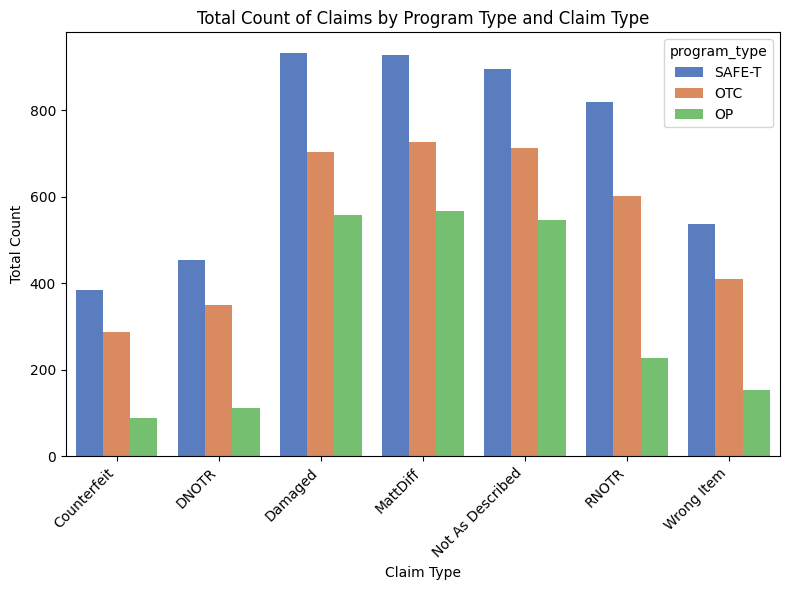

In [ ]:
custom_palette = ["#1f77b4", "#ff7f0e",'green']
plt.figure(figsize=(8,6))
sns.barplot(df,x='claim_type',y='total_count',hue='program_type')
plt.title('Total Count of Claims by Program Type and Claim Type')
plt.xlabel('Claim Type')
plt.ylabel('Total Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

SAFE-T prgram shows the highest count of claims across all claim types , followed by OTC and OP

### 3.4 Fraud Probability & Seller Correlation  
Examines fraud-probability patterns across claim types and isolates sellers exhibiting both high refund totals and elevated fraud risk.


***Average fraud probability by claim type***

In [ ]:
query="""
SELECT program_type  ,
AVG(fraud_probability) AS mean_prob_score
FROM returns_cases
GROUP BY program_type
ORDER BY mean_prob_score DESC
"""

df=pd.read_sql(query,conn)
df

,program_type,mean_prob_score
0,SAFE-T,0.402623
1,OTC,0.396617
2,OP,0.359226


Fraud probability peaks in {SAFE-T} followed closely by {OTC}

Top 10 Sellers with both high refund totals and high fraud probability

`Who contributes to fraud`

In [ ]:
query="""

SELECT seller_id  , market,
AVG(fraud_probability) AS mean_prob_score,
SUM(refund_amount) as total_refund_amt
FROM returns_cases
GROUP BY seller_id,market
ORDER BY mean_prob_score DESC , total_refund_amt DESC LIMIT 10
"""

df=pd.read_sql(query,conn)
df

,seller_id,market,mean_prob_score,total_refund_amt
0,778,EU,0.795045,823.38
1,905,NAM,0.753025,640.29
2,432,EU,0.725998,2007.38
3,440,NAM,0.707941,992.94
4,351,NAM,0.707289,864.67
5,749,EU,0.693445,493.57
6,466,NAM,0.689132,820.94
7,426,NAM,0.679335,402.12
8,350,EU,0.676631,693.47
9,796,EU,0.669219,770.76


### 3.5 Refund Value & Category Hotspots  
Compares refund behavior across claim types, markets, and categories to pinpoint high-value or high-fraud clusters.  
Highlights top 3 categories per program where refund magnitude and fraud rates intersect.


What is the total and average refund amount per claim type and per market

`Which areas are costly`

**Note on Currency Handling**  
> Refund values in this dataset are reported in the native currencies of each marketplace —  
> **USD for NAM** and **EUR for EU**.  
>
> To maintain data integrity and operational comparability, refunds have been analyzed **in their original currencies** without applying exchange-rate conversions.  
>
> Refund-related metrics (totals, averages,corelation) are therefore interpreted **within each market context**.  
>
> When comparing results across markets, most findings are interpreted in **relative terms** — such as fraud rates (%), refund share (%), or Fraud Impact Index (FII) — rather than absolute refund values.  


In [ ]:
query="""
SELECT claim_type,market,
AVG(refund_amount) AS mean_refund_amount,
SUM(refund_amount) AS total_refund_amount
FROM returns_cases
GROUP BY claim_type,market
"""

df=pd.read_sql(query,conn)

df_EU=df[df['market']=='EU'].sort_values(by=['total_refund_amount'],ascending=[False])

df_NAM=df[df['market']=='NAM'].sort_values(by=['total_refund_amount'],ascending=[False])

In [ ]:
df_EU

,claim_type,market,mean_refund_amount,total_refund_amount
10,RNOTR,EU,99.443183,61555.33
8,Not As Described,EU,50.399317,43545.01
12,Wrong Item,EU,96.134468,40664.88
6,MattDiff,EU,46.979552,39838.66
4,Damaged,EU,42.899391,38008.86
2,DNOTR,EU,85.949972,30598.19
0,Counterfeit,EU,84.803719,24169.06


In [ ]:
df_NAM

,claim_type,market,mean_refund_amount,total_refund_amount
11,RNOTR,NAM,90.549601,93084.99
13,Wrong Item,NAM,99.803796,67567.17
5,Damaged,NAM,47.832901,62661.10
7,MattDiff,NAM,44.540044,61198.02
9,Not As Described,NAM,45.195112,58437.28
1,Counterfeit,NAM,104.695660,49939.83
3,DNOTR,NAM,88.773768,49713.31


For the EU market , Top 2 Claim Types which are the costliest are RNOTR (Return Not Recieved) , Not As Described, since RNOTR claims would involve full reimburesemnts , they prove to me more costly and shows room for more SOP refinement

For the NA market , Top 2 Claim Types which are the costliest are RNOTR (Return Not Recieved) , Wrong Item , since both these claims would again involve full reimburesemnts , they prove to me more costly and shows room for more SOP refinement


Category-Wise Hotspots

“Are certain product categories or ASIN groups showing more fraud-related activity or higher reimbursements?”

Top 3 product categories per program (SAFE-T, OTC, OP) with the highest fraud rate

 **Fraud Rate (%)** | (Fraudulent cases ÷ Total cases) × 100 |
 Indicates what percentage of total return cases were flagged as fraudulent. |


In [ ]:
query="""


WITH CTE AS (
SELECT category,program_type,
SUM(fraud_flag) AS total_fraud_count,
COUNT(fraud_flag) AS count
FROM returns_cases
GROUP BY program_type,category)

SELECT program_type,category,
ROUND((total_fraud_count*100.0 /count),2) AS fraud_rate
FROM CTE
ORDER BY program_type DESC , fraud_rate DESC


"""

df_category_fraud_rate=pd.read_sql(query,conn)

df_category_fraud_rate

,program_type,category,fraud_rate
0,SAFE-T,Electronics,43.91
1,SAFE-T,Beauty,36.85
2,SAFE-T,Misc,31.89
3,SAFE-T,Apparel,24.10
4,SAFE-T,Home & Kitchen,23.86
5,SAFE-T,Toys,21.69
6,SAFE-T,Books,21.65
7,OTC,Electronics,41.37
8,OTC,Beauty,37.45
9,OTC,Misc,33.49


`FINDING THE TOP 3 CATEGORIES`

In [ ]:
query="""

WITH CTE AS (
SELECT category,program_type,
SUM(fraud_flag) AS total_fraud_count,
COUNT(fraud_flag) AS count
FROM returns_cases
GROUP BY program_type,category),

CTE1 AS (SELECT *,
ROUND((total_fraud_count*100.0 /count),2) AS fraud_rate
FROM CTE),

CTE2 AS
(SELECT *, DENSE_RANK() OVER(PARTITION BY program_type ORDER BY fraud_rate DESC) AS RK
FROM CTE1)

SELECT program_type,category,fraud_rate
FROM CTE2
WHERE RK<=3
ORDER BY program_type DESC , fraud_rate DESC


"""

df_category_fraud_rate_3=pd.read_sql(query,conn)

df_category_fraud_rate_3

,program_type,category,fraud_rate
0,SAFE-T,Electronics,43.91
1,SAFE-T,Beauty,36.85
2,SAFE-T,Misc,31.89
3,OTC,Electronics,41.37
4,OTC,Beauty,37.45
5,OTC,Misc,33.49
6,OP,Electronics,32.22
7,OP,Misc,28.91
8,OP,Beauty,25.81


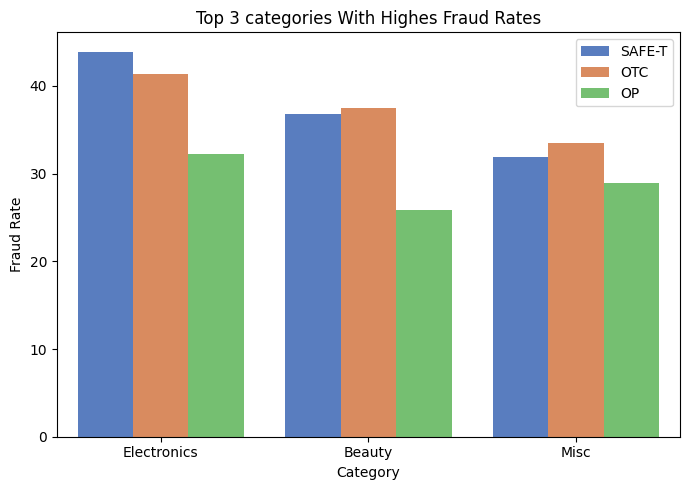

In [ ]:
plt.figure(figsize=(7,5))
sns.barplot(df_category_fraud_rate_3,x='category',y='fraud_rate',hue='program_type')

plt.title('Top 3 categories With Highes Fraud Rates')
plt.xlabel('Category')
plt.ylabel('Fraud Rate')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Across all three programs — SAFE-T, OTC, and OP
Electronics consistently ranks as the top high-fraud category, with fraud rates ranging from 32% to 44%.

Beauty and Miscellaneous follow a similar pattern, with elevated fraud activity, particularly in OTC where refund verification tends to be more lenient.

This trend suggests that high-value or easily substitutable items (like electronics and cosmetics) are more frequently targeted for fraudulent reimbursements.

### 3.6 Fraud Impact Index (FII)  
The Fraud Impact Index quantifies category-level monetary risk exposure.  
Higher FII values indicate program types or categories where moderate fraud rates still translate into substantial refund losses.


Fraud Impact Index (FII) = Avg Refund × Fraud Rate

 **Fraud Impact Index (FII)** Composite indicator showing potential financial risk per category or program.
 A higher FII means higher fraud-driven losses.

`Quantifying the risk`

In [ ]:
query="""
SELECT category, program_type,market,
SUM(fraud_flag) AS total_fraud_count,
COUNT(*) AS total_cases,
ROUND(AVG(refund_amount),2) AS avg_refund,
ROUND((SUM(fraud_flag) * 100.0 / COUNT(*)), 2) AS fraud_rate,
ROUND((AVG(refund_amount) * (SUM(fraud_flag) * 100.0 / COUNT(*)) / 100), 2) AS fraud_impact_index
FROM returns_cases
GROUP BY program_type, category,market
ORDER BY  program_type ASC ,  market ASC ,  fraud_impact_index DESC
"""


df_category_fraud_impact=pd.read_sql(query,conn)

df_category_fraud_impact


,category,program_type,market,total_fraud_count,total_cases,avg_refund,fraud_rate,fraud_impact_index
0,Electronics,OP,EU,79,246,70.79,32.11,22.73
1,Books,OP,EU,19,98,80.82,19.39,15.67
2,Misc,OP,EU,16,46,35.30,34.78,12.28
3,Apparel,OP,EU,28,180,58.72,15.56,9.13
4,Home & Kitchen,OP,EU,15,117,67.22,12.82,8.62
5,Beauty,OP,EU,29,125,35.64,23.20,8.27
6,Toys,OP,EU,8,77,52.63,10.39,5.47
7,Electronics,OP,NAM,114,353,63.74,32.29,20.58
8,Home & Kitchen,OP,NAM,32,201,76.40,15.92,12.16
9,Apparel,OP,NAM,36,275,80.79,13.09,10.58


`Checking TOP 3 Categories across each market and program type for FII values  `

In [ ]:
query="""
WITH CTE AS
(SELECT category, program_type,market,
SUM(fraud_flag) AS total_fraud_count,
COUNT(*) AS total_cases,
ROUND(AVG(refund_amount),2) AS avg_refund,
ROUND((SUM(fraud_flag) * 100.0 / COUNT(*)), 2) AS fraud_rate,
ROUND((AVG(refund_amount) * (SUM(fraud_flag) * 100.0 / COUNT(*)) / 100), 2) AS fraud_impact_index
FROM returns_cases
GROUP BY program_type, category,market
ORDER BY  program_type ASC ,  market ASC ,  fraud_impact_index DESC),

CTE1 AS (
SELECT * ,
DENSE_RANK() OVER(PARTITION BY program_type , market ORDER BY fraud_impact_index DESC ) AS RK
FROM CTE)

SELECT category,program_type,
market,fraud_impact_index FROM CTE1
WHERE RK <=3

"""


df_category_fraud_impact=pd.read_sql(query,conn)

df_category_fraud_impact

,category,program_type,market,fraud_impact_index
0,Electronics,OP,EU,22.73
1,Books,OP,EU,15.67
2,Misc,OP,EU,12.28
3,Electronics,OP,NAM,20.58
4,Home & Kitchen,OP,NAM,12.16
5,Apparel,OP,NAM,10.58
6,Electronics,OTC,EU,32.12
7,Home & Kitchen,OTC,EU,25.05
8,Toys,OTC,EU,19.17
9,Electronics,OTC,NAM,32.95


While fraud rate indicates how often fraud occurs, it doesn’t capture its financial severity.
The Fraud Impact Index combines the fraud rate with the average refund amount to measure the potential monetary exposure per category.

A higher FII signals that a category not only faces frequent frauds but also involves higher payouts — making it a prime target for SOP tightening and monitoring.

In OP,OTC and SAFE-T based on fraud_rates (section 4.3) alone ,

 top 3 categories were Electronics , Beauty and Misc

But based on the FII, top 3 categories channge and provide more deeper insight :

For OP , OTC and SAFE-T they are : Electronics , Books ,Home & Kitchen


## 4️⃣ Operational KPI & SLA Analysis

This section evaluates how efficiently the returns process operates across programs and markets.  

It measures SLA adherence/breach, handling time and resolution in days, and examines how delays relate to refund value and fraud incidence.  

The goal is to assess whether the current operational performance supports or hinders effective fraud and reimbursement control.


### 4.1 SLA Adherence by Program  
Evaluates whether each program type is adhering to expected SLA thresholds.  
Cases exceeding 125% of their program-specific average handling time are flagged as SLA breaches.



`“Are we meeting our internal SLA targets across programs?”`



 **SLA Breach % (Minutes)** | (Cases exceeding 125% of avg handling time ÷ Total cases) × 100

 | Measures operational efficiency — how often handling time exceeds the expected SLA. |


In [ ]:
# SLA threshold as @ 1.25× the average

In [ ]:
query="""

WITH CTE AS (
SELECT program_type ,ROUND(AVG(handling_time_minutes),2) AS avg_time
FROM returns_cases
GROUP BY program_type),


CTE1 AS (SELECT T1.program_type,
COUNT(*) AS total_case_ct, T2.avg_time,
SUM(CASE WHEN T1.handling_time_minutes> 1.25* T2.avg_time THEN 1 ELSE 0 END) AS sla_breaches_ct,
ROUND(SUM(CASE WHEN T1.handling_time_minutes> 1.25 * T2.avg_time THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS sla_breach_pct
FROM returns_cases AS T1
JOIN CTE AS T2
ON T1.program_type=T2.program_type
GROUP BY T1.program_type)


SELECT program_type , avg_time ,
sla_breach_pct
FROM CTE1
ORDER BY sla_breach_pct DESC
"""

df_program_sla_summary=pd.read_sql(query,conn)

df_program_sla_summary

,program_type,avg_time,sla_breach_pct
0,SAFE-T,3.98,26.10
1,OP,11.44,22.22
2,OTC,7.00,6.51


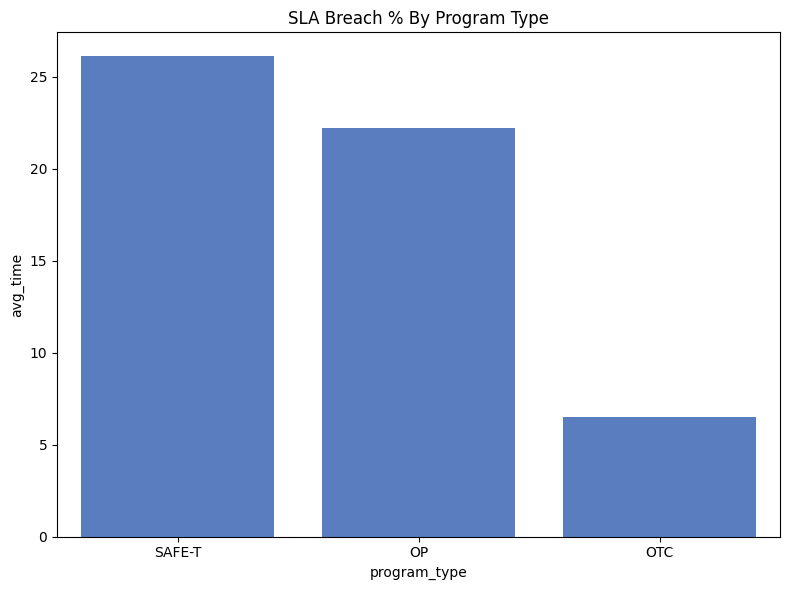

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(df_program_sla_summary,x='program_type',y='sla_breach_pct')
plt.title('SLA Breach % By Program Type')
plt.xlabel('program_type')
plt.ylabel('avg_time')
plt.tight_layout()
plt.show()

SLA Adherence Analysis

Dynamic SLA thresholds were defined using the 1.25 times average handling times for each program (SAFE-T: 4 mins, OTC: 7 mins, OP: 11 mins).


Analysis showed that SLA breaches were most frequent in the SAFE-T and OP programs, with 26.1% and 22.2% of cases exceeding their respective thresholds.
In contrast, OTC maintained a strong adherence rate (only 6.5% breaches), indicating more efficient SOP execution and simpler case validation flows.

The higher breach rates in SAFE-T, despite shorter handling expectations, suggest either a high incoming workload or bottlenecks in reimbursement validation.
OP’s longer average times align with its process complexity, which involves seller performance review and multi-step verification.

### 4.2 Claim Type Efficiency  
Identifies which claim types, within each program, are the most time-consuming and contribute to SLA breaches.  

This helps prioritize process improvements and training focus areas.


`“Which claim types are most time-consuming?”`

SLA thresholds were dynamically adjusted per claim type and program, allowing realistic benchmarking (with a 25% tolerance buffer).


In [ ]:
query="""

WITH CTE AS (
SELECT claim_type ,program_type, ROUND(AVG(handling_time_minutes),2) AS avg_time
FROM returns_cases
GROUP BY claim_type,program_type),


CTE1 AS (SELECT T1.claim_type, T2.program_type,
COUNT(*) AS total_case_ct, T2.AVG_TIME,
SUM(CASE WHEN T1.handling_time_minutes> 1.25* T2.AVG_TIME THEN 1 ELSE 0 END) AS sla_breaches_ct,
ROUND(SUM(CASE WHEN T1.handling_time_minutes> 1.25 * T2.AVG_TIME THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS sla_breach_pct
FROM returns_cases AS T1
JOIN CTE AS T2
ON T1.claim_type=T2.claim_type AND T1.program_type = T2.program_type
GROUP BY T1.claim_type,T2.program_type
ORDER BY T1.claim_type ASC , sla_breach_pct DESC)

SELECT claim_type , program_type,total_case_ct,
sla_breach_pct
FROM CTE1
ORDER BY program_type DESC , sla_breach_pct DESC

"""

df=pd.read_sql(query,conn)

df

,claim_type,program_type,total_case_ct,sla_breach_pct
0,RNOTR,SAFE-T,819,26.62
1,MattDiff,SAFE-T,929,26.37
2,Wrong Item,SAFE-T,538,25.65
3,Counterfeit,SAFE-T,385,25.19
4,Damaged,SAFE-T,934,24.73
5,Not As Described,SAFE-T,897,3.68
6,DNOTR,SAFE-T,455,1.98
7,RNOTR,OTC,601,7.15
8,Not As Described,OTC,714,7.14
9,Damaged,OTC,705,7.09


SAFE-T exhibited the highest SLA breach rates across nearly all claim types, with rnotr, ‘Materially Different’, and ‘Wrong Item’ exceeding 25%.
This indicates that short SLA targets (≈4 mins) are unfeasible for high-documentation claim types.

OTC processes were more stable, with breach rates between 6–7%,suggesting good SOP structure and policy adherence

The analysis highlights the need to revisit SLA targets for SAFE-T

### 4.3 Market Efficiency & SLA Comparison  

This analysis compares average handling and resolution performance across markets and programs.  
By combining both handling and resolution SLAs, we can identify which regional teams or programs are the most efficient and where operational bottlenecks occur.

**SLA definitions:**  
- **Handling SLA Breach:** Handling time > 1.25× program average  
- **Resolution SLA Breach:** Resolution time > 5 days



`“Is our European team slower or faster than the North American one?”`


 **SLA Breach % (Days)** : (Cases resolved beyond 5 days ÷ Total cases) ×100

 Evaluates end-to-end case resolution timeliness.


In [ ]:
query="""

WITH CTE AS (
SELECT market ,program_type,
ROUND(AVG(handling_time_minutes),2) AS avg_time,
ROUND(AVG(resolution_time_days), 2) AS avg_days
FROM returns_cases
GROUP BY market,program_type)


SELECT T1.market, T2.program_type, T2.avg_time,T2.avg_days,
ROUND(SUM(CASE WHEN T1.handling_time_minutes> 1.25 * T2.avg_time THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS sla_breach_pct_minutes,
ROUND(SUM(CASE WHEN T1.resolution_time_days > 5 THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS sla_breach_days_pct
FROM returns_cases AS T1
JOIN CTE AS T2
ON T1.program_type=T2.program_type  AND T1.market=T2.market
GROUP BY T1.market,T2.program_type
ORDER BY T2.program_type ASC
"""

df_sla_performance_summary=pd.read_sql(query,conn)

df_sla_performance_summary

,market,program_type,avg_time,avg_days,sla_breach_pct_minutes,sla_breach_days_pct
0,EU,OP,11.34,3.80,22.50,13.05
1,NAM,OP,11.50,3.88,22.04,14.62
2,EU,OTC,7.01,4.38,6.68,26.29
3,NAM,OTC,6.99,4.31,6.41,24.59
4,EU,SAFE-T,3.98,4.27,26.10,22.72
5,NAM,SAFE-T,3.98,4.37,26.11,25.07


**Observations — Market Efficiency & SLA Comparison**  

- **SAFE-T** shows the highest SLA breach rates across both handling and resolution metrics, with around **26 %** of cases exceeding SLA limits in both EU and NAM regions.  

- **OTC** programs handle cases quickly (≈ 7 minutes on average) but exhibit high resolution-day breaches (≈ 25 %), suggesting back-end processing delays even after initial handling.  

- **OP** programs perform relatively consistently across markets, maintaining moderate breach levels (~22 %).  

- **Regional performance:** Both regions showed near-identical SLA breach percentages, indicating strong alignment of global process standards and SOP adherence. Although NAM handled roughly 40–50% higher case volumes across programs.

- Overall, short handling times don’t always translate to faster resolutions — operational follow-through remains the key bottleneck.


### 4.4 Program-Level SLA Breach (Resolution Days)  
Assesses SLA compliance in terms of case resolution time.  
Cases resolved beyond 5 days are counted as SLA breaches.


**SLA Adherence (%)** | 100 – SLA Breach % |

sla_adherence_days_pct	: opposite of sla_breach_days_pct ,Shows how consistently teams meet performance targets.

In [ ]:
query="""

WITH CTE AS (
SELECT program_type,
ROUND(AVG(resolution_time_days), 2) AS avg_days
FROM returns_cases
GROUP BY program_type)

SELECT T1.program_type,T2.avg_days,
COUNT(*) AS total_case_ct,
SUM(CASE WHEN T1.resolution_time_days > 5 THEN 1 ELSE 0 END) AS sla_breach_days_ct,
ROUND(100.0*(COUNT(*) - SUM(CASE WHEN T1.resolution_time_days > 5 THEN 1 ELSE 0 END))/ COUNT(*),2) AS  sla_adherence_days_pct
-- ROUND(SUM(CASE WHEN T1.resolution_time_days > 5 THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS sla_breach_days_pct
FROM returns_cases AS T1
JOIN CTE AS T2
ON T1.program_type = T2.program_type
GROUP BY T1.program_type
ORDER BY sla_adherence_days_pct DESC

"""

df=pd.read_sql(query,conn)
df

,program_type,avg_days,total_case_ct,sla_breach_days_ct,sla_adherence_days_pct
0,OP,3.84,2250,315,86.00
1,SAFE-T,4.33,4957,1197,75.85
2,OTC,4.33,3793,957,74.77


OP program consistently closes within SLA (86% adherence), while OTC lags behind with 75%.”

### 4.5 Resolution Time Corelation With Refund Amount  
Analyzes whether longer investigations correlate with higher refund values.

Correlation is calculated overall and by program type.


`“Do longer investigations result in higher refunds?”`

In [ ]:
query = """
SELECT program_type, handling_time_minutes, refund_amount
FROM returns_cases
"""
df = pd.read_sql(query, conn)

# overall correlation
corr_overall = df['handling_time_minutes'].corr(df['refund_amount'])

# correlation by program
df_refund_time_correlation = df.groupby('program_type').apply(lambda g: g['handling_time_minutes'].corr(g['refund_amount'])).reset_index(name='correlation')


/tmp/ipython-input-18719023.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_refund_time_correlation = df.groupby('program_type').apply(lambda g: g['handling_time_minutes'].corr(g['refund_amount'])).reset_index(name='correlation')


Correlation results are **unitless** and unaffected by currency differences.

In [ ]:
corr_overall

np.float64(-0.001154592106270207)

In [ ]:
df_refund_time_correlation

,program_type,correlation
0,OP,0.053274
1,OTC,0.021957
2,SAFE-T,0.003767


Correlation values remain close to zero, indicating **no strong linear relationship** between the duration of claim handling and the payout value.  

- **OP (r ≈ 0.05)** , **OTC (r ≈ 0.02)** , **SAFE-T (r ≈ 0.00)**:  virtually no link between investigation time and refund size; refund amounts are independent of duration.  

These results suggest that operational delays do not directly escalate reimbursement costs.  
Instead, refund amounts are likely determined by claim policy type rather than processing time.


### 4.6 SLA Breach vs Fraud Rate  
Examines whether fraud-prone cases take longer to resolve or lead to higher SLA breach rates.  
Helps determine if operational inefficiency is partially driven by fraud complexity.


`“Are fraud-prone cases causing SLA delays?”`

In [ ]:
query="""


SELECT program_type,
COUNT(*) AS total_ct,
COUNT(CASE WHEN fraud_flag =1 THEN 1 END) AS fraud_ct,
ROUND(AVG(handling_time_minutes),2) AS avg_time,
ROUND(AVG(CASE WHEN fraud_flag =1 THEN handling_time_minutes ELSE 0 END),2) AS fraud_avg_time
FROM returns_cases
GROUP BY program_type


"""

df_sla_fraud_link=pd.read_sql(query,conn)

df_sla_fraud_link

,program_type,total_ct,fraud_ct,avg_time,fraud_avg_time
0,OP,2250,486,11.44,2.47
1,OTC,3793,1135,7.00,2.10
2,SAFE-T,4957,1537,3.98,1.23


Fraudulent cases resolve faster than average
fraud-related cases have shorter handling times than overall averages.
That implies these cases are being flagged early, likely due to pattern recognition, standard SOP automation, or predefined rule-based workflows.

This shows that the SLA Breaches are not entirley due to fraud cases taking longer to resolve.

### 📝 4.7 Section Summary

- SLA adherence varies notably across programs; **OTC** shows the highest adherence

- **Claim types like “MAterially Different” and Damaged Item”** are major delay drivers across all programs

- Regional differences exist but too small to have an impact— **Europe** slightly underperforms in SLA breach in handling time and resolution days compared to **North America**.  

- Resolution time shows NO correlation with refund amount, implying no link between investigation time and refund size; refund amounts are independent of duration.  

- Fraudulent cases resolve faster than average fraud-related cases have shorter handling times than overall averages


## 5️⃣ Fraud Trends & Exposure Pattern Analysis  

This section identifies where, when, and how fraud losses occur.  

It examines high-risk sellers and categories, tracks month-over-month fraud rate trends, isolates repeat offenders, segments exposure by risk level, and maps regional hotspots.  

The goal is to reveal concentration zones of monetary risk that can guide SOP enforcement and preventive actions.



`spotting where fraud happens and how it’s trending.`

### 5.1 High-Fraud Sellers & Categories

Highlights top sellers and categories contributing disproportionately to fraudulent refunds.  

Metrics include fraud rate %, total refund, and fraud refund share %.  


`“Which sellers  contribute most to total fraud losses?”`

 **Fraud Refund Share (%)** : (Total fraud refund amount ÷ Total refund amount)× 100

 Highlights how much of the total refund value was linked to fraudulent claims. This helps assess financial exposure beyond just case count.


In [ ]:
# Top 20 fraudulent Sellers

query="""
SELECT seller_id ,market,
ROUND(SUM(fraud_flag)*100.0/COUNT(fraud_flag),2) AS FRAUD_RATE,
SUM(refund_amount) AS TOTAL_AMOUNT,
SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END) AS TOT_FRAUD_AMT,
SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END)*100.0 / SUM(refund_amount) AS fraud_refund_share_pct,
AVG(CASE WHEN fraud_flag=1 THEN fraud_probability ELSE 0 END) AS FRAUD_SCORE
FROM returns_cases
GROUP BY seller_id,market
ORDER BY FRAUD_RATE DESC , fraud_refund_share_pct DESC  LIMIT 20

"""

df_seller_fraud_summary=pd.read_sql(query,conn)

df_seller_fraud_summary

,seller_id,market,FRAUD_RATE,TOTAL_AMOUNT,TOT_FRAUD_AMT,fraud_refund_share_pct,FRAUD_SCORE
0,905,NAM,100.00,640.29,640.29,100.000000,0.753025
1,426,NAM,100.00,402.12,402.12,100.000000,0.679335
2,380,NAM,100.00,5.85,5.85,100.000000,0.570091
3,125,NAM,100.00,629.44,629.44,100.000000,0.613083
4,614,NAM,92.86,884.90,870.48,98.370437,0.627163
5,765,NAM,92.31,1741.69,1684.96,96.742819,0.616407
6,351,NAM,91.67,864.67,833.04,96.341957,0.672731
7,432,EU,90.00,2007.38,1981.32,98.701790,0.685286
8,811,EU,90.00,692.12,682.90,98.667861,0.564045
9,778,EU,90.00,823.38,808.20,98.156380,0.753122


Identified the top 20 sellers with the highest fraud rates.
Some sellers showed 100% fraud rate and high refund exposure, indicating potential system abuse.

`“Which categories contribute most to total fraud losses?”`

fraud_refund_share % = (Total fraud refund ÷ Total refund) × 100

it helps to account for % of fraudulent refunds rather than simple fraud_rate

In [ ]:
query="""
SELECT category ,
ROUND(SUM(fraud_flag)*100.0/COUNT(*),2) AS fraud_rate,
ROUND(SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END) * 100.0 / SUM(refund_amount), 2)
AS fraud_refund_share_pct
FROM returns_cases
GROUP BY category
ORDER BY FRAUD_RATE DESC

"""

df_category=pd.read_sql(query,conn)

df_category

,category,fraud_rate,fraud_refund_share_pct
0,Electronics,40.58,69.82
1,Beauty,34.84,61.55
2,Misc,31.83,56.21
3,Home & Kitchen,21.97,36.96
4,Books,21.52,32.15
5,Apparel,21.42,34.52
6,Toys,19.01,34.01


In [ ]:
query="""
SELECT category , program_type,
ROUND(SUM(fraud_flag)*100.0/COUNT(*),2) AS fraud_rate,
ROUND(SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END) * 100.0 / SUM(refund_amount), 2)
AS fraud_refund_share_pct
FROM returns_cases
GROUP BY category, program_type
ORDER BY category ASC, FRAUD_RATE DESC

"""

df_category_fraud_summary=pd.read_sql(query,conn)

df_category_fraud_summary

,category,program_type,fraud_rate,fraud_refund_share_pct
0,Apparel,SAFE-T,24.10,36.81
1,Apparel,OTC,22.31,38.35
2,Apparel,OP,14.07,23.44
3,Beauty,OTC,37.45,58.86
4,Beauty,SAFE-T,36.85,72.23
5,Beauty,OP,25.81,34.45
6,Books,OTC,24.42,37.90
7,Books,SAFE-T,21.65,30.54
8,Books,OP,16.46,24.11
9,Electronics,SAFE-T,43.91,72.91


In [ ]:
# Total COunt of unique sellers
returns['seller_id'].nunique()

1000

In [ ]:
query="""
WITH CTE AS
(
SELECT seller_id,
SUM(CASE WHEN fraud_flag = 1 THEN refund_amount ELSE 0 END) AS TOT_FRAUD_AMT
FROM returns_cases
GROUP BY seller_id
ORDER BY TOT_FRAUD_AMT DESC
LIMIT 200
)

SELECT
-- Total refund amount for all cases
(SELECT SUM(refund_amount) FROM returns_cases) AS TOTAL_AMOUNT,

-- Total fraud amount for all cases
(SELECT SUM(CASE WHEN fraud_flag = 1 THEN refund_amount ELSE 0 END) FROM returns_cases) AS TOT_FRAUD_AMT,

-- Total fraud amount for the top 10 sellers
(SELECT SUM(TOT_FRAUD_AMT) FROM CTE) AS TOP_10_FRAUD_TOT,

-- Fraud percentage of top 10 fraud amount compared to the total fraud amount
ROUND(
(SELECT SUM(TOT_FRAUD_AMT) FROM CTE) * 100.0 /
(SELECT SUM(CASE WHEN fraud_flag = 1 THEN refund_amount ELSE 0 END) FROM returns_cases),2) AS FRAUD_CONC_PCT;

"""

df=pd.read_sql(query,conn)

df

,TOTAL_AMOUNT,TOT_FRAUD_AMT,TOP_10_FRAUD_TOT,FRAUD_CONC_PCT
0,720981.69,346830.38,193176.63,55.7



`Cross-referencing their refund totals revealed that 20% of sellers contributed to nearly 56% of fraudulent reimbursements.`

### 5.2 Monthly Fraud Trend by Program

Tracks month-over-month fraud rates and refund exposure across programs.  

3-month moving averages smooth out volatility, providing early warning signals of emerging fraud spikes.


`“Has the fraud rate increased or decreased month-over-month across programs?”`

In [ ]:
query="""
SELECT
strftime('%Y-%m', return_date) AS year_month,
program_type,
COUNT(*) AS total_cases,
SUM(CASE WHEN fraud_flag = 1 THEN 1 ELSE 0 END) AS fraud_cases,
ROUND(100.0 * SUM(CASE WHEN fraud_flag = 1 THEN 1 ELSE 0 END)/COUNT(*), 2) AS fraud_rate_pct,
SUM(refund_amount) AS total_refund,
SUM(CASE WHEN fraud_flag = 1 THEN refund_amount ELSE 0 END) AS fraud_refund
FROM returns_cases
GROUP BY year_month, program_type
ORDER BY year_month, program_type;


"""

df_trend=pd.read_sql(query,conn)

df_trend

,year_month,program_type,total_cases,fraud_cases,fraud_rate_pct,total_refund,fraud_refund
0,2023-01,OP,46,11,23.91,2153.65,1041.85
1,2023-01,OTC,46,15,32.61,4180.28,2099.20
2,2023-01,SAFE-T,80,22,27.50,5175.69,1381.61
3,2023-02,OP,77,23,29.87,5936.64,2343.77
4,2023-02,OTC,157,43,27.39,11126.95,4269.69
...,...,...,...,...,...,...,...
64,2024-10,OTC,123,37,30.08,7556.31,2447.67
65,2024-10,SAFE-T,160,47,29.38,9573.82,4266.19
66,2024-11,OP,4,0,0.00,331.40,0.00
67,2024-11,OTC,2,1,50.00,103.26,97.59


In [ ]:
df_trend['fraud_rate_ma3'] = df_trend.groupby('program_type')['fraud_rate_pct'].transform(lambda x: x.rolling(3).mean())


In [ ]:
df_trend['fraud_rate_mom'] = df_trend.groupby('program_type')['fraud_rate_pct'].pct_change() * 100


In [ ]:
df_trend

,year_month,program_type,total_cases,fraud_cases,fraud_rate_pct,total_refund,fraud_refund,fraud_rate_ma3,fraud_rate_mom
0,2023-01,OP,46,11,23.91,2153.65,1041.85,NaN,NaN
1,2023-01,OTC,46,15,32.61,4180.28,2099.20,NaN,NaN
2,2023-01,SAFE-T,80,22,27.50,5175.69,1381.61,NaN,NaN
3,2023-02,OP,77,23,29.87,5936.64,2343.77,NaN,24.926809
4,2023-02,OTC,157,43,27.39,11126.95,4269.69,NaN,-16.007360
...,...,...,...,...,...,...,...,...,...
64,2024-10,OTC,123,37,30.08,7556.31,2447.67,28.040000,15.692308
65,2024-10,SAFE-T,160,47,29.38,9573.82,4266.19,30.330000,-2.456839
66,2024-11,OP,4,0,0.00,331.40,0.00,12.270000,-100.000000
67,2024-11,OTC,2,1,50.00,103.26,97.59,35.360000,66.223404


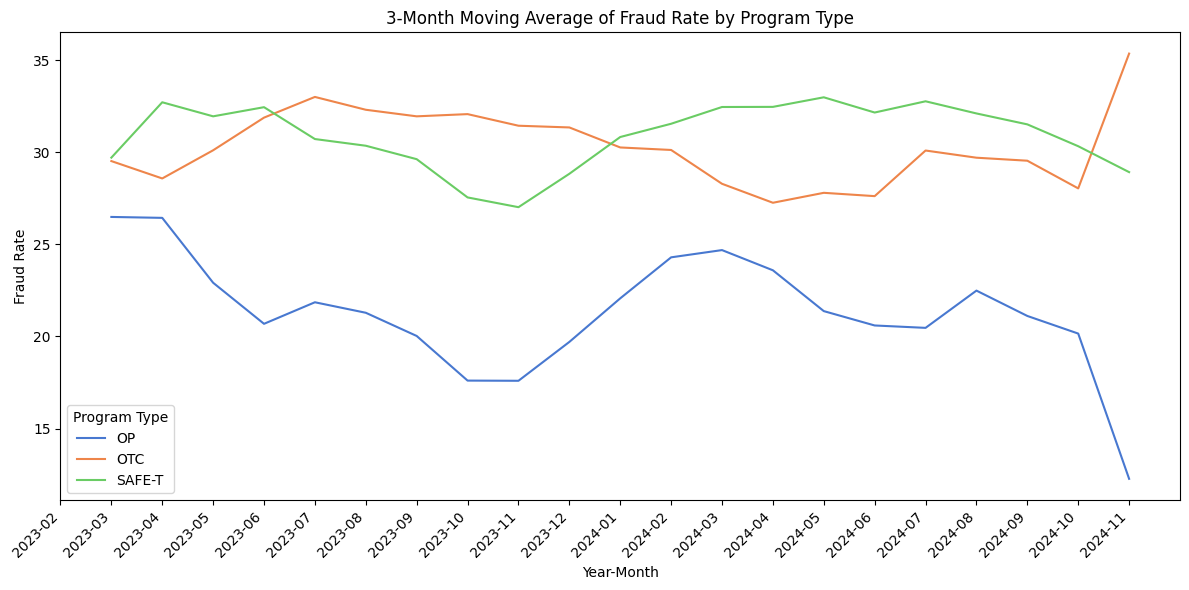

In [ ]:

plt.figure(figsize=(12,6))
sns.lineplot(data=df_trend, x='year_month', y='fraud_rate_ma3', hue='program_type')
plt.title("3-Month Moving Average of Fraud Rate by Program Type")
plt.xlabel('Year-Month')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Program Type', loc='lower left')
plt.tight_layout()
plt.show()


### 5.3 Repeat Offenders (3-Month Window)

Lists sellers with multiple fraud-flagged cases in the past 3 months, ranked by fraud count and refund value.
  
These represent recurring risk entities that merit audit or account suspension.


`“Which sellers have multiple fraud-flagged cases within the last 3 months?”`

In [ ]:
query="""
SELECT seller_id,
SUM(CASE WHEN fraud_flag=1 THEN 1 ELSE 0 END) AS fraud_ct,
SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END) AS fraud_refund,
AVG(fraud_probability) AS mean_fraud_score
FROM returns_cases
WHERE strftime('%Y-%m', return_date) BETWEEN '2024-09' AND '2024-11'
GROUP BY seller_id
HAVING fraud_ct > 1
ORDER BY fraud_ct DESC , mean_fraud_score DESC limit 25
"""

df=pd.read_sql(query,conn)

df

,seller_id,fraud_ct,fraud_refund,mean_fraud_score
0,831,6,161.49,0.546182
1,726,4,87.04,0.550896
2,908,3,189.30,0.700598
3,938,3,73.56,0.632690
4,741,3,434.74,0.565262
5,68,2,297.03,0.761433
6,972,2,232.54,0.735821
7,339,2,174.63,0.727305
8,319,2,164.71,0.715032
9,436,2,180.77,0.685689


In [ ]:
query="""
WITH CTE AS (
SELECT seller_id,
SUM(CASE WHEN fraud_flag = 1 THEN 1 ELSE 0 END) AS top_fraud_ct,
SUM(CASE WHEN fraud_flag = 1 THEN refund_amount ELSE 0 END) AS top_fraud_refund
FROM returns_cases
WHERE strftime('%Y-%m', return_date) BETWEEN '2024-09' AND '2024-11'
GROUP BY seller_id
HAVING top_fraud_ct > 1
ORDER BY top_fraud_ct DESC , top_fraud_refund DESC limit 25
)

SELECT
(SELECT SUM(top_fraud_ct) FROM CTE) AS top_fraud_ct,
(SELECT SUM(top_fraud_refund) FROM CTE) AS top_fraud_refund,
(SELECT SUM(CASE WHEN fraud_flag = 1 THEN 1 ELSE 0 END)
FROM returns_cases
WHERE strftime('%Y-%m', return_date) BETWEEN '2024-09' AND '2024-11') AS tot_fraud_ct,
(SELECT SUM(CASE WHEN fraud_flag = 1 THEN refund_amount ELSE 0 END)
FROM returns_cases
WHERE strftime('%Y-%m', return_date) BETWEEN '2024-09' AND '2024-11') AS tot_fraud_refund;

"""

df=pd.read_sql(query,conn)

df

,top_fraud_ct,top_fraud_refund,tot_fraud_ct,tot_fraud_refund
0,59,7071.68,250,23818.54


In the past three months, the top 25 sellers collectively accounted for 59 fraud-flagged cases, with several exhibiting consistent patterns of abuse.

These sellers were responsible for 23.6% of all fraud cases (59 out of 250) and 29.6% of the total refund amount linked to fraud (7071.681 out of 23,818.54).

This group forms the basis for targeted audits and preventive account reviews aimed at mitigating recurring fraudulent behavior.

### 5.4 Fraud Risk Bands & Refund Exposure

Aggregates total refund exposure by risk band (Low / Medium / High).  






`That tells us whether the fraud scoring system is doing its job — i.e., are high scores capturing the costliest frauds?`

In [ ]:
# Checking the distribution of fraud_score

returns['fraud_probability'].describe()

,fraud_probability
count,11000.000000
mean,0.391675
std,0.193135
min,0.056556
25%,0.252485
50%,0.339193
75%,0.521468
max,1.000000


 **%_Total_Refund_Exposure** : (Refunds in segment ÷ Total refunds across all segments) × 100

Shows what share of all refunded money comes from a specific program and risk band  highlights high-value areas of exposure.
How much this segment contributes to all refunds combined (across both markets and all risk bands)

In [ ]:
query="""
WITH CTE AS (
SELECT *,
CASE
  WHEN fraud_probability < 0.3 THEN 'Low'
  WHEN fraud_probability < 0.7 THEN 'Medium'
  ELSE 'High'
END AS fraud_risk_band
FROM returns_cases)

SELECT fraud_risk_band,market,
COUNT(*) AS Cases,
SUM(refund_amount) AS Total_refund,
ROUND(AVG(refund_amount),2) AS Avg_refund_value,
ROUND(SUM(refund_amount)*100.0/(SELECT SUM(refund_amount) FROM returns_cases),2) AS '%_total_refund_exposure',
ROUND(AVG(fraud_probability),3) AS Avg_frud_score
FROM CTE
GROUP BY fraud_risk_band , market
ORDER BY
CASE fraud_risk_band
WHEN 'Low' THEN 1
WHEN 'Medium' THEN 2
WHEN 'High' THEN 3
END


"""

df_fraud_risk_bands=pd.read_sql(query,conn)
df_fraud_risk_bands

,fraud_risk_band,market,Cases,Total_refund,Avg_refund_value,%_total_refund_exposure,Avg_frud_score
0,Low,EU,1574,55074.20,34.99,7.64,0.203
1,Low,NAM,2389,86499.13,36.21,12.00,0.203
2,Medium,EU,2384,181188.22,76.00,25.13,0.456
3,Medium,NAM,3764,279684.04,74.31,38.79,0.454
4,High,EU,323,42117.57,130.39,5.84,0.801
5,High,NAM,566,76418.53,135.02,10.60,0.793


Shows that most refund losses stem from Medium-risk,and gretaer than the 60th percentile probability claims.

### 5.5 Regional / Category Hotspots

Combines market, category, and claim type to locate the most fraud-exposed intersections.  

Reveals how regional product trends align with risk concentration, aiding targeted SOP interventions.


In [ ]:
query="""
SELECT market,category,claim_type,
COUNT(*) AS total_cases,
SUM(CASE WHEN fraud_flag=1 THEN 1 ELSE 0 END) AS fraud_cases,
ROUND(SUM(CASE WHEN fraud_flag=1 THEN 1 ELSE 0 END)*100.0/COUNT(*),2) AS fraud_rate,
ROUND(AVG(refund_amount),2) AS avg_refund_amt,
ROUND(SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END),2) AS total_fraud_refund,
ROUND(SUM(CASE WHEN fraud_flag=1 THEN refund_amount ELSE 0 END)*100.0 /SUM(refund_amount),2) AS fraud_refund_share_pct
FROM returns_cases
GROUP BY market, category, claim_type
ORDER BY market, category, claim_type;

"""

df_market_category_hots=pd.read_sql(query,conn)

df_market_category_hots

,market,category,claim_type,total_cases,fraud_cases,fraud_rate,avg_refund_amt,total_fraud_refund,fraud_refund_share_pct
0,EU,Apparel,Counterfeit,56,10,17.86,99.93,1657.30,29.62
1,EU,Apparel,DNOTR,67,45,67.16,108.38,4705.74,64.81
2,EU,Apparel,Damaged,195,4,2.05,44.79,360.66,4.13
3,EU,Apparel,MattDiff,187,6,3.21,47.52,602.60,6.78
4,EU,Apparel,Not As Described,163,7,4.29,50.69,882.30,10.68
...,...,...,...,...,...,...,...,...,...
93,NAM,Toys,Damaged,123,1,0.81,49.61,143.84,2.36
94,NAM,Toys,MattDiff,144,2,1.39,49.50,586.80,8.23
95,NAM,Toys,Not As Described,133,3,2.26,40.26,531.01,9.92
96,NAM,Toys,RNOTR,75,52,69.33,93.96,5025.96,71.32


In [ ]:
#to see top 15 exposure combinations.

df.sort_values(by='fraud_refund_share_pct',ascending=False).head(15)

,market,category,claim_type,total_cases,fraud_cases,fraud_rate_pct,avg_refund_amt,total_fraud_refund,fraud_refund_share_pct
7,EU,Beauty,Counterfeit,47,22,46.81,37.35,1755.60,100.00
8,EU,Beauty,DNOTR,74,64,86.49,27.84,2060.34,100.00
56,NAM,Beauty,Counterfeit,56,26,46.43,64.92,3635.65,100.00
57,NAM,Beauty,DNOTR,117,99,84.62,26.34,3081.91,100.00
36,EU,Misc,DNOTR,27,20,74.07,22.48,606.92,100.00
85,NAM,Misc,DNOTR,44,35,79.55,63.95,2813.66,100.00
35,EU,Misc,Counterfeit,11,5,45.45,42.92,472.10,100.00
22,EU,Electronics,DNOTR,67,57,85.07,125.94,8265.33,97.95
89,NAM,Misc,RNOTR,60,49,81.67,26.40,1543.11,97.43
43,EU,Toys,DNOTR,36,34,94.44,120.86,4221.17,97.02


## 6️⃣ SOP Impact Analysis (Simulated Pre vs Post Evaluation)


This section simulates a pre– and post–SOP comparison to evaluate how key KPIs might shift under standardized process improvements.  

The goal is to quantify potential efficiency and fraud risk impact, assuming SOP measures  were implemented mid-2024.  


_Note:_  
For simulation, **July 1 2024** was used as the notional SOP introduction date.  
Dates before this are treated as “Pre-SOP,” and those after as “Post-SOP.”  


### 7.1 Program-Level SOP Impact  
Pre- vs Post-SOP metrics by program type &  market (EU vs NAM) showing shifts in fraud rate, handling time, SLA adherence, and refund exposure, ETC

| KPI Type        | Metrics                                                  |
| --------------- | -------------------------------------------------------- |
| **Descriptive** | `avg_refund`, `avg_handling_time`, `avg_resolution_days` |
| **Operational** | `sla_breach_pct_minutes`, `sla_breach_pct_days`          |
| **Risk**        | `fraud_rate`, `avg_fraud_prob_score`                     |
| **Financial**   | `fraud_refund_share_pct`, `FII`                          |


> **Approach Summary – Two-Stage SOP KPI Evaluation**
>
> This analysis uses a two-layer CTE structure:
> - **CTE1** computes baseline averages (refunds, handling time, resolution time, and fraud probability) for each `market × program_type × SOP_period`.
> - **CTE2** joins the detailed records back to those baselines to calculate derived ratios and KPI percentages such as SLA breaches, fraud rate, refund share, and Fraud Impact Index (FII).
>
> The final pivot presents pre- vs post-SOP metrics along with delta values, enabling a holistic view of operational efficiency, risk trends, and financial exposure across programs and marketplaces.


In [ ]:
query="""
-- CTE1 → base averages
-- CTE2 → ratios, rates, percentages

WITH CTE1 AS (
SELECT market, program_type,
CASE
WHEN return_date < '2024-07-01' THEN 'Pre-SOP'
ELSE 'Post-SOP'
END AS sop_period,
COUNT(*) AS total_cases,
ROUND(AVG(refund_amount), 2) AS avg_refund,
ROUND(AVG(handling_time_minutes), 2) AS avg_handling_time,
ROUND(AVG(resolution_time_days), 2) AS avg_resolution_days,
ROUND(AVG(fraud_probability), 3) AS avg_fraud_prob_score
FROM returns_cases
GROUP BY sop_period, market, program_type
),

CTE2 AS (
SELECT T1.market, T1.program_type,
T1.sop_period, T1.total_cases,
T1.avg_refund, T1.avg_handling_time,
T1.avg_resolution_days,T1.avg_fraud_prob_score,

-- SLA Breach % (minutes)
ROUND
(SUM(CASE WHEN T2.handling_time_minutes > 1.25 * T1.avg_handling_time THEN 1 ELSE 0 END)* 100.0 / T1.total_cases, 2)
AS sla_breach_pct_minutes,

-- SLA Breach % (days)
ROUND
(SUM(CASE WHEN T2.resolution_time_days > 5 THEN 1 ELSE 0 END)* 100.0 / T1.total_cases, 2)
AS sla_breach_pct_days,

-- Fraud rate %
ROUND(SUM(T2.fraud_flag) * 100.0 / T1.total_cases, 2)
AS fraud_rate,

-- Fraud refund share %
ROUND(SUM(CASE WHEN T2.fraud_flag = 1 THEN T2.refund_amount ELSE 0 END)* 100.0 / NULLIF(SUM(T2.refund_amount),0), 2)
AS fraud_refund_share_pct,

-- Fraud Impact Index (Avg Refund × Fraud Rate)
ROUND(T1.avg_refund * (SUM(T2.fraud_flag) * 1.0 / T1.total_cases) ,2)
AS FII

FROM CTE1 AS T1
JOIN returns_cases AS T2
ON T1.market = T2.market
AND T1.program_type = T2.program_type AND T1.market=T2.market
--AND ((T1.sop_period = 'Pre-SOP'  AND T2.return_date < '2024-07-01')
--OR (T1.sop_period = 'Post-SOP' AND T2.return_date >= '2024-07-01'))

GROUP BY
T1.market,T1.program_type,T1.sop_period
)

SELECT market, program_type,

  -- Descriptive
  MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_refund END) AS pre_avg_refund,
  MAX(CASE WHEN sop_period='Post-SOP' THEN avg_refund END) AS post_avg_refund,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN avg_refund END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_refund END), 2) AS delta_avg_refund,

  -- Operational
  MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_handling_time END) AS pre_avg_handling_time,
  MAX(CASE WHEN sop_period='Post-SOP' THEN avg_handling_time END) AS post_avg_handling_time,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN avg_handling_time END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_handling_time END), 2) AS delta_avg_handling_time,

  MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_resolution_days END) AS pre_avg_resolution_days,
  MAX(CASE WHEN sop_period='Post-SOP' THEN avg_resolution_days END) AS post_avg_resolution_days,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN avg_resolution_days END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_resolution_days END), 2) AS delta_avg_resolution_days,

  MAX(CASE WHEN sop_period='Pre-SOP' THEN sla_breach_pct_minutes END) AS pre_sla_breach_pct_minutes,
  MAX(CASE WHEN sop_period='Post-SOP' THEN sla_breach_pct_minutes END) AS post_sla_breach_pct_minutes,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN sla_breach_pct_minutes END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN sla_breach_pct_minutes END), 2) AS delta_sla_breach_pct_minutes,

  MAX(CASE WHEN sop_period='Pre-SOP' THEN sla_breach_pct_days END) AS pre_sla_breach_pct_days,
  MAX(CASE WHEN sop_period='Post-SOP' THEN sla_breach_pct_days END) AS post_sla_breach_pct_days,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN sla_breach_pct_days END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN sla_breach_pct_days END), 2) AS delta_sla_breach_pct_days,

  -- Risk
  MAX(CASE WHEN sop_period='Pre-SOP' THEN fraud_rate END) AS pre_fraud_rate,
  MAX(CASE WHEN sop_period='Post-SOP' THEN fraud_rate END) AS post_fraud_rate,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN fraud_rate END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN fraud_rate END), 2) AS delta_fraud_rate,

  MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_fraud_prob_score END) AS pre_fraud_prob_score,
  MAX(CASE WHEN sop_period='Post-SOP' THEN avg_fraud_prob_score END) AS post_fraud_prob_score,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN avg_fraud_prob_score END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN avg_fraud_prob_score END), 3) AS delta_fraud_prob_score,

  -- Financial
  MAX(CASE WHEN sop_period='Pre-SOP' THEN fraud_refund_share_pct END) AS pre_fraud_refund_share_pct,
  MAX(CASE WHEN sop_period='Post-SOP' THEN fraud_refund_share_pct END) AS post_fraud_refund_share_pct,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN fraud_refund_share_pct END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN fraud_refund_share_pct END), 2) AS delta_fraud_refund_share_pct,

  MAX(CASE WHEN sop_period='Pre-SOP' THEN FII END) AS pre_FII,
  MAX(CASE WHEN sop_period='Post-SOP' THEN FII END) AS post_FII,
  ROUND(MAX(CASE WHEN sop_period='Post-SOP' THEN FII END) -
        MAX(CASE WHEN sop_period='Pre-SOP' THEN FII END), 2) AS delta_FII

FROM CTE2
GROUP BY market, program_type
ORDER BY program_type, market;


"""


df_sop_market_program=pd.read_sql(query,conn)

df_sop_market_program


,market,program_type,pre_avg_refund,post_avg_refund,delta_avg_refund,pre_avg_handling_time,post_avg_handling_time,delta_avg_handling_time,pre_avg_resolution_days,post_avg_resolution_days,...,delta_fraud_rate,pre_fraud_prob_score,post_fraud_prob_score,delta_fraud_prob_score,pre_fraud_refund_share_pct,post_fraud_refund_share_pct,delta_fraud_refund_share_pct,pre_FII,post_FII,delta_FII
0,EU,OP,64.00,46.17,-17.83,11.38,11.15,-0.23,3.79,3.84,...,88.57,0.359,0.364,0.005,39.07,39.07,0.0,17.22,53.32,36.10
1,NAM,OP,61.51,52.31,-9.20,11.56,11.25,-0.31,3.88,3.86,...,97.77,0.361,0.348,-0.013,35.58,35.58,0.0,15.97,64.72,48.75
2,EU,OTC,68.21,65.04,-3.17,7.02,6.97,-0.05,4.38,4.35,...,131.45,0.404,0.388,-0.016,51.27,51.27,0.0,26.17,110.45,84.28
3,NAM,OTC,66.00,64.04,-1.96,6.98,7.03,0.05,4.31,4.31,...,122.56,0.395,0.388,-0.007,48.05,48.05,0.0,23.52,101.31,77.79
4,EU,SAFE-T,65.80,62.13,-3.67,3.99,3.97,-0.02,4.29,4.17,...,120.34,0.395,0.386,-0.009,48.61,48.61,0.0,23.41,96.87,73.46
5,NAM,SAFE-T,70.19,62.34,-7.85,3.97,4.01,0.04,4.37,4.35,...,137.97,0.408,0.412,0.004,53.65,53.65,0.0,27.75,110.66,82.91


In [ ]:
df_sop_market_program=df_sop_market_program[[
    'market',
    'program_type',
    'delta_avg_refund',
    'delta_avg_handling_time',
    'delta_sla_breach_pct_minutes',
    'delta_sla_breach_pct_days',
    'delta_fraud_rate',
    'delta_fraud_prob_score',
    'delta_fraud_refund_share_pct',
    'delta_FII']]
df_sop_market_program

,market,program_type,delta_avg_refund,delta_avg_handling_time,delta_sla_breach_pct_minutes,delta_sla_breach_pct_days,delta_fraud_rate,delta_fraud_prob_score,delta_fraud_refund_share_pct,delta_FII
0,EU,OP,-17.83,-0.23,128.21,52.96,88.57,0.005,0.0,36.10
1,NAM,OP,-9.20,-0.31,100.45,66.63,97.77,-0.013,0.0,48.75
2,EU,OTC,-3.17,-0.05,28.05,110.41,131.45,-0.016,0.0,84.28
3,NAM,OTC,-1.96,0.05,27.01,103.60,122.56,-0.007,0.0,77.79
4,EU,SAFE-T,-3.67,-0.02,108.44,94.40,120.34,-0.009,0.0,73.46
5,NAM,SAFE-T,-7.85,0.04,-15.47,107.00,137.97,0.004,0.0,82.91


a negative delta (↓ fraud rate) actually means improvement,

aa positive delta (↑ fraud rate) MEANS (worse).

### 7.2 Program × Claim-Type Impact (Dynamic SLA)  
Detailed comparison using dynamic SLA thresholds to capture performance deltas across claim types within each program.  
This highlights where operational gains or regressions are most significant.

In [ ]:
query="""
-- CTE1 → base averages & dynamic SLA threshold
-- CTE2 → KPI metrics (Operational + Risk + Financial)
-- Final → pivot Pre/Post + delta

WITH CTE1 AS (
  SELECT
    program_type,
    claim_type,
    ROUND(AVG(handling_time_minutes), 2) AS avg_handling_time,
    ROUND(1.25 * AVG(handling_time_minutes), 2) AS sla_threshold
  FROM returns_cases
  GROUP BY program_type, claim_type
),

CTE2 AS (
  SELECT
    T1.market,
    T1.program_type,
    T1.claim_type,
    CASE
      WHEN T1.return_date < '2024-07-01' THEN 'Pre-SOP'
      ELSE 'Post-SOP'
    END AS sop_period,

    COUNT(*) AS total_cases,

    -- Descriptive
    ROUND(AVG(T1.refund_amount), 2) AS avg_refund,

    -- Operational
    ROUND(AVG(T1.handling_time_minutes), 2) AS avg_handling_time,
    ROUND(AVG(T1.resolution_time_days), 2) AS avg_resolution_days,

    -- SLA Breach % (Dynamic Threshold)
    ROUND(SUM(CASE WHEN T1.handling_time_minutes > T2.sla_threshold THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS sla_breach_pct_minutes,

    -- SLA Breach % (Fixed 5-day rule)
    ROUND(SUM(CASE WHEN T1.resolution_time_days > 5 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS sla_breach_pct_days,

    -- Risk KPIs
    ROUND(SUM(CASE WHEN T1.fraud_flag = 1 THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS fraud_rate_pct,
    ROUND(AVG(T1.fraud_probability), 3) AS avg_fraud_prob_score,

    -- Financial KPIs
    ROUND(SUM(CASE WHEN T1.fraud_flag = 1 THEN T1.refund_amount ELSE 0 END) * 100.0 / NULLIF(SUM(T1.refund_amount), 0), 2) AS fraud_refund_share_pct,
    ROUND(AVG(T1.refund_amount) * (SUM(CASE WHEN T1.fraud_flag = 1 THEN 1 ELSE 0 END) * 1.0 / COUNT(*)), 2) AS FII

  FROM returns_cases AS T1
  JOIN CTE1 AS T2
    ON T1.program_type = T2.program_type
   AND T1.claim_type = T2.claim_type

  GROUP BY sop_period, T1.program_type, T1.claim_type , T1.market
),

pivoted AS (
  SELECT
  market,
    program_type,
    claim_type,

    -- Descriptive
    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN avg_refund END) AS pre_avg_refund,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN avg_refund END) AS post_avg_refund,

    -- Operational
    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN avg_handling_time END) AS pre_avg_handling_time,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN avg_handling_time END) AS post_avg_handling_time,

    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN avg_resolution_days END) AS pre_avg_resolution_days,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN avg_resolution_days END) AS post_avg_resolution_days,

    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN sla_breach_pct_minutes END) AS pre_sla_breach_pct_minutes,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN sla_breach_pct_minutes END) AS post_sla_breach_pct_minutes,

    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN sla_breach_pct_days END) AS pre_sla_breach_pct_days,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN sla_breach_pct_days END) AS post_sla_breach_pct_days,

    -- Risk
    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN fraud_rate_pct END) AS pre_fraud_rate,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN fraud_rate_pct END) AS post_fraud_rate,

    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN avg_fraud_prob_score END) AS pre_fraud_prob_score,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN avg_fraud_prob_score END) AS post_fraud_prob_score,

    -- Financial
    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN fraud_refund_share_pct END) AS pre_fraud_refund_share_pct,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN fraud_refund_share_pct END) AS post_fraud_refund_share_pct,

    MAX(CASE WHEN sop_period = 'Pre-SOP' THEN FII END) AS pre_FII,
    MAX(CASE WHEN sop_period = 'Post-SOP' THEN FII END) AS post_FII

  FROM CTE2
  GROUP BY market,program_type, claim_type
)

SELECT
  market,
  program_type,
  claim_type,

  -- Descriptive
  pre_avg_refund,
  post_avg_refund,
  ROUND(COALESCE(post_avg_refund, 0) - COALESCE(pre_avg_refund, 0), 2) AS delta_avg_refund,

  -- Operational
  pre_avg_handling_time,
  post_avg_handling_time,
  ROUND(COALESCE(post_avg_handling_time, 0) - COALESCE(pre_avg_handling_time, 0), 2) AS delta_avg_handling_time,

  pre_avg_resolution_days,
  post_avg_resolution_days,
  ROUND(COALESCE(post_avg_resolution_days, 0) - COALESCE(pre_avg_resolution_days, 0), 2) AS delta_avg_resolution_days,

  pre_sla_breach_pct_minutes,
  post_sla_breach_pct_minutes,
  ROUND(COALESCE(post_sla_breach_pct_minutes, 0) - COALESCE(pre_sla_breach_pct_minutes, 0), 2) AS delta_sla_breach_pct_minutes,

  pre_sla_breach_pct_days,
  post_sla_breach_pct_days,
  ROUND(COALESCE(post_sla_breach_pct_days, 0) - COALESCE(pre_sla_breach_pct_days, 0), 2) AS delta_sla_breach_pct_days,

  -- Risk
  pre_fraud_rate,
  post_fraud_rate,
  ROUND(COALESCE(post_fraud_rate, 0) - COALESCE(pre_fraud_rate, 0), 2) AS delta_fraud_rate,

  pre_fraud_prob_score,
  post_fraud_prob_score,
  ROUND(COALESCE(post_fraud_prob_score, 0) - COALESCE(pre_fraud_prob_score, 0), 3) AS delta_fraud_prob_score,

  -- Financial
  pre_fraud_refund_share_pct,
  post_fraud_refund_share_pct,
  ROUND(COALESCE(post_fraud_refund_share_pct, 0) - COALESCE(pre_fraud_refund_share_pct, 0), 2) AS delta_fraud_refund_share_pct,

  pre_FII,
  post_FII,
  ROUND(COALESCE(post_FII, 0) - COALESCE(pre_FII, 0), 2) AS delta_FII

FROM pivoted
ORDER BY market,program_type, delta_fraud_rate DESC;





"""

df_sop_claimtype=pd.read_sql(query,conn)

df_sop_claimtype

,market,program_type,claim_type,pre_avg_refund,post_avg_refund,delta_avg_refund,pre_avg_handling_time,post_avg_handling_time,delta_avg_handling_time,pre_avg_resolution_days,...,delta_fraud_rate,pre_fraud_prob_score,post_fraud_prob_score,delta_fraud_prob_score,pre_fraud_refund_share_pct,post_fraud_refund_share_pct,delta_fraud_refund_share_pct,pre_FII,post_FII,delta_FII
0,EU,OP,Wrong Item,85.47,52.63,-32.84,11.20,10.70,-0.50,5.39,...,10.87,0.490,0.514,0.024,63.55,81.71,18.16,33.44,26.31,-7.13
1,EU,OP,Damaged,49.50,25.63,-23.87,11.04,10.84,-0.20,2.95,...,3.85,0.285,0.282,-0.003,5.92,16.61,10.69,3.05,2.56,-0.49
2,EU,OP,DNOTR,169.38,28.37,-141.01,11.38,12.78,1.40,6.94,...,3.60,0.720,0.660,-0.060,81.07,100.00,18.93,144.47,25.21,-119.26
3,EU,OP,MattDiff,42.46,49.85,7.39,11.39,11.47,0.08,3.01,...,0.77,0.282,0.289,0.007,14.26,5.84,-8.42,3.21,4.15,0.94
4,EU,OP,RNOTR,108.77,88.88,-19.89,12.10,11.53,-0.57,5.98,...,-4.10,0.606,0.632,0.026,93.71,77.32,-16.39,90.34,70.17,-20.17
5,EU,OP,Counterfeit,142.62,99.91,-42.71,12.06,9.50,-2.56,4.64,...,-9.09,0.492,0.512,0.020,35.46,91.44,55.98,60.51,33.30,-27.21
6,EU,OP,Not As Described,46.00,42.38,-3.62,11.42,11.05,-0.37,3.55,...,-11.54,0.305,0.277,-0.028,20.78,0.00,-20.78,5.31,0.00,-5.31
7,EU,OTC,Counterfeit,87.40,123.58,36.18,7.24,6.36,-0.88,4.53,...,34.23,0.459,0.534,0.075,48.06,86.98,38.92,25.71,78.64,52.93
8,EU,OTC,RNOTR,113.92,108.90,-5.02,7.06,7.15,0.09,6.16,...,5.49,0.579,0.560,-0.019,76.82,94.00,17.18,83.50,85.80,2.30
9,EU,OTC,MattDiff,47.37,50.15,2.78,6.98,6.86,-0.12,3.03,...,3.32,0.278,0.276,-0.002,9.53,11.78,2.25,3.42,5.28,1.86


In [ ]:
df_sop_claimtype=df_sop_claimtype[[
    'program_type',
    'claim_type',
    'delta_avg_refund',
    'delta_fraud_rate',
    'delta_avg_handling_time',
    'delta_avg_resolution_days',
    'delta_sla_breach_pct_minutes',
    'delta_sla_breach_pct_days',
    'delta_fraud_refund_share_pct',
    'delta_FII'
]]
df_sop_claimtype

,program_type,claim_type,delta_avg_refund,delta_fraud_rate,delta_avg_handling_time,delta_avg_resolution_days,delta_sla_breach_pct_minutes,delta_sla_breach_pct_days,delta_fraud_refund_share_pct,delta_FII
0,OP,Wrong Item,-32.84,10.87,-0.50,0.11,0.43,-3.48,18.16,-7.13
1,OP,Damaged,-23.87,3.85,-0.20,0.15,1.44,0.00,10.69,-0.49
2,OP,DNOTR,-141.01,3.60,1.40,-0.83,-4.25,-9.80,18.93,-119.26
3,OP,MattDiff,7.39,0.77,0.08,0.24,9.63,0.00,-8.42,0.94
4,OP,RNOTR,-19.89,-4.10,-0.57,-0.24,0.90,-11.78,-16.39,-20.17
5,OP,Counterfeit,-42.71,-9.09,-2.56,-0.31,-24.24,3.03,55.98,-27.21
6,OP,Not As Described,-3.62,-11.54,-0.37,-0.18,-7.84,0.00,-20.78,-5.31
7,OTC,Counterfeit,36.18,34.23,-0.88,-0.44,-8.24,-4.17,38.92,52.93
8,OTC,RNOTR,-5.02,5.49,0.09,0.05,3.74,-4.42,17.18,2.30
9,OTC,MattDiff,2.78,3.32,-0.12,0.02,-0.03,0.00,2.25,1.86


a negative delta (↓ fraud rate) actually means improvement,
shown in green,
and a positive delta (↑ fraud rate) shown in  red (worse).

### 📈 SOP Impact Evaluation — Contextual Note

This section simulates a **pre- and post-SOP (Standard Operating Procedure) performance evaluation** using existing data.  
The intent is to demonstrate how key KPIs — such as handling time, SLA adherence, and fraud rate — *would* be compared before and after a process change.

No actual SOP modifications were implemented in this dataset; therefore, these results **do not represent real operational improvements**.  
The analysis framework shown here serves as a **methodological example** for tracking change once a new SOP or policy is deployed.

In a live environment, this same workflow would:
- Measure true pre- vs post-implementation performance,
- Quantify operational and fraud-related impact, and
- Help leadership validate whether the SOP achieved its intended goals.

## 7️⃣ Dashboard Creation & KPI Export

This final step prepares and exports the curated datasets required for building the Excel dashboard.  

Each dataframe captures a focused analytical layer from the notebook — such as operational efficiency, fraud exposure, or SOP impact — and is saved as a separate CSV for visualization.

The exported files serve as clean, ready-to-use inputs for Excel allowing interactive dashboards to be built without re-running SQL or Python code.


In [ ]:

# df_kpi_overview_1.to_csv("overview.csv", index=False)
# df_kpi_overview_2.to_csv("kpi_overview.csv", index=False)
# df_category_fraud_rate.to_csv("category_fraud_rate.csv",index=False)
# df_category_fraud_impact.to_csv("category_fraud_impact.csv",index=False)

# df_program_sla_summary.to_csv("program_sla_summary.csv",index=False)
# df_sla_performance_summary.to_csv("sla_performance_summary",index=False)
# df_refund_time_correlation.to_csv("refund_time_correlation",index=False)
# df_sla_fraud_link.to_csv("sla_fraud_link.csv",index=False)

# df_seller_fraud_summary.to_csv("seller_fraud_summary.csv",index=False)
# df_category_fraud_summary.to_csv("df_category_fraud_summary.csv", index=False)
# df_trend.to_csv("trend.csv",index=False)
# df_fraud_risk_bands.to_csv("regional_category_hotspots.csv",index=False)
# df_market_category_hots.to_csv("market_category_hots.csv",index=False)


# df_sop_market_program.to_csv("sop_market_program",index=False)
# df_sop_claimtype.to_csv("op_claimtype",index=False)






| Dataset                          | Section | Purpose                                                | Dashboard Page         |
| -------------------------------- | ------- | ------------------------------------------------------ | ---------------------- |
| `overview.csv`                   | 4.1     | Dataset scope summary                                  | Overview               |
| `kpi_overview.csv`               | 4.2     | Core descriptive KPIs (fraud %, refund, handling time) | Overview               |
| `category_fraud_rate.csv`        | 4.3     | Program × Category fraud rates                         | Overview               |
| `category_fraud_impact.csv`      | 4.4     | FII & risk concentration by category                   | Overview               |
| `program_sla_summary.csv`        | 5.1     | SLA adherence by program                               | Operational Efficiency |
| `sla_performance_summary.csv`    | 5.2     | SLA breaches by claim type                             | Operational Efficiency |
| `refund_time_correlation.csv`    | 5.5     | Correlation between refund & handling time             | Operational Efficiency |
| `sla_fraud_link.csv`             | 5.6     | SLA breach vs fraud rate                               | Operational Efficiency |
| `seller_fraud_summary.csv`       | 6.1     | Seller-level fraud concentration                       | Fraud & Risk           |
| `category_fraud_summary.csv`     | 6.2     | Category-level refund exposure (ratio metrics only)    | Fraud & Risk           |
| `trend.csv`                      | 6.3     | Monthly fraud trend                                    | Trends                 |
| `regional_category_hotspots.csv` | 6.6     | Market × Category fraud hotspots                       | Trends                 |
| `sop_market_program.csv`         | 7.1     | Pre/Post SOP deltas (market × program)                 | SOP Impact             |
| `sop_claimtype.csv`              | 7.2     | Pre/Post SOP deltas (program × claim type)             | SOP Impact             |


In [ ]:
# Example consolidated block
# export_files = {
#     "overview": df_kpi_overview_1,
#     "kpi_overview": df_kpi_overview_2,
#     "category_fraud_rate": df_category_fraud_rate,
#     "category_fraud_impact": df_category_fraud_impact,
#     "program_sla_summary": df_program_sla_summary,
#     "sla_performance_summary": df_sla_performance_summary,
#     "refund_time_correlation": df_refund_time_correlation,
#     "sla_fraud_link": df_sla_fraud_link,
#     "seller_fraud_summary": df_seller_fraud_summary,
#     "category_fraud_summary": df_category_fraud_summary,
#     "trend": df_trend,
#     "regional_category_hotspots": df_fraud_risk_bands,
#     "market_category_hots":df_market_category_hots,
#     "sop_market_program": df_sop_market_program,
#     "sop_claimtype": df_sop_claimtype
# }

# for name, df in export_files.items():
#     df.to_csv(f"{name}.csv", index=False)


### ✅ Notebook Summary

This notebook concludes the analytical component of the **Amazon Returns & Reimbursement Risk Analysis** project.  
All key datasets have been exported for dashboarding, enabling a visual exploration of fraud, operational efficiency, and potential SOP impact.  

Together, these exports form the foundation for actionable insights and continuous process monitoring in returns management.


## 🏁 Project Summary

This project analyzed Amazon’s Return & Reimbursement operations using SQL, Python, and Excel.

**Scope:**
- 11,000 cases across 2 markets and 3 programs (SAFE-T, OP, OTC)
- Metrics evaluated across fraud risk, refund exposure, and SLA performance

**Outcomes:**
- Identified that ~30% of returns exhibit fraud patterns, concentrated in 20% of sellers.
- Electronics , Beauty , Home & Kitchen , Apparel categories show the highest fraud exposure.
- SAFE-T program had the highest SLA breach.


**Next Steps:**
- Automate these KPIs with Redshift + Power BI pipelines.
- Extend fraud detection modeling using ML-based anomaly scoring.


